<a href="https://colab.research.google.com/github/heispv/programming-feb2023/blob/master/28_programming_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the libarries

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [33]:
!pip install mplfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 1.7 MB/s eta 0:00:00


In [34]:
import mplfinance as mpf

# Preprocess the data

Miam va be koamke `pd.read_csv('file_location')` file csv ro be onave yek pandas dataframe mikhoonim.

In [2]:
data = pd.read_csv('/content/drive/MyDrive/ML_codes/GBP_CAD-15.csv')

> Baraye inke 5 khat aval yek dataframe ro bebinim mitoonim az method e `.head()` estefade konim. agar khastim 5 khat akhar oon ro bebinim, mitoonim az method e `.tail()` estefade konim.

In [3]:
data.head()

,2022.10.17,5:00,1.55482,1.555,1.55409,1.55464
0,2022.10.17,5:15,1.55464,1.55488,1.55401,1.55404
1,2022.10.17,5:30,1.55404,1.55518,1.55362,1.55383
2,2022.10.17,5:45,1.55383,1.55432,1.55304,1.55322
3,2022.10.17,6:00,1.55322,1.55356,1.55244,1.55278
4,2022.10.17,6:15,1.55278,1.55330,1.55262,1.55273


> Ba tavajoh be inke data ma sutun hash esmi nadasht, bayad baraye harkudum azoona yek esm entekhab konim.

In [4]:
column_names = ['date', 'time', 'open', 'high', 'low', 'close']
data.columns = column_names

In [5]:
data.head()

,date,time,open,high,low,close
0,2022.10.17,5:15,1.55464,1.55488,1.55401,1.55404
1,2022.10.17,5:30,1.55404,1.55518,1.55362,1.55383
2,2022.10.17,5:45,1.55383,1.55432,1.55304,1.55322
3,2022.10.17,6:00,1.55322,1.55356,1.55244,1.55278
4,2022.10.17,6:15,1.55278,1.55330,1.55262,1.55273


> be komake raveshe bala avvalin radif data e ma hazf shode, baraye inke in etefagh nayofte, mitoonim moghei ke darim az `.read_csv()` estefade mikonim argument `names` ro be onave yek optinal argument be method emoon pass bedim va tooye in list e esme sutun haro benvisim.

In [8]:
data = pd.read_csv('/content/drive/MyDrive/ML_codes/GBP_CAD-15.csv', names = column_names)

In [15]:
type(data)

pandas.core.frame.DataFrame

In [9]:
data.head()

,date,time,open,high,low,close
0,2022.10.17,5:00,1.55482,1.55500,1.55409,1.55464
1,2022.10.17,5:15,1.55464,1.55488,1.55401,1.55404
2,2022.10.17,5:30,1.55404,1.55518,1.55362,1.55383
3,2022.10.17,5:45,1.55383,1.55432,1.55304,1.55322
4,2022.10.17,6:00,1.55322,1.55356,1.55244,1.55278


In [25]:
close_bars = data['close'][:100]
close_bars

0     1.55464
1     1.55404
2     1.55383
3     1.55322
4     1.55278
       ...   
95    1.55652
96    1.55744
97    1.55705
98    1.55668
99    1.55705
Name: close, Length: 100, dtype: float64

In [18]:
type(close_bars)

pandas.core.series.Series

In [26]:
close_bars = np.array(close_bars)
close_bars

array([1.55464, 1.55404, 1.55383, 1.55322, 1.55278, 1.55273, 1.55338,
       1.55386, 1.55435, 1.55408, 1.55275, 1.55202, 1.55288, 1.55297,
       1.55454, 1.55636, 1.55802, 1.55964, 1.56111, 1.55984, 1.55797,
       1.55698, 1.555  , 1.55587, 1.55844, 1.55522, 1.55522, 1.55554,
       1.55624, 1.55798, 1.55958, 1.55887, 1.55726, 1.55922, 1.56122,
       1.55777, 1.5559 , 1.55715, 1.5598 , 1.56116, 1.55924, 1.55882,
       1.5597 , 1.55969, 1.56116, 1.55994, 1.56161, 1.55914, 1.55728,
       1.55912, 1.56091, 1.56431, 1.56825, 1.56968, 1.56572, 1.56714,
       1.56722, 1.56784, 1.56576, 1.56318, 1.56312, 1.56186, 1.56072,
       1.56197, 1.56101, 1.55936, 1.55898, 1.55866, 1.5591 , 1.55892,
       1.55799, 1.55844, 1.55855, 1.55842, 1.55782, 1.55796, 1.55836,
       1.5584 , 1.55792, 1.55768, 1.5586 , 1.55888, 1.5582 , 1.55652,
       1.55761, 1.55756, 1.55729, 1.55692, 1.55811, 1.55694, 1.55733,
       1.55734, 1.5579 , 1.55734, 1.55716, 1.55652, 1.55744, 1.55705,
       1.55668, 1.55

In [23]:
print(f'Number of dimensions for close_bars: {close_bars.ndim}\nShape of the close_bars: {close_bars.shape}')

Number of dimensions for close_bars: 1
Shape of the close_bars: (100,)


## Visualizing the data with close of the candles

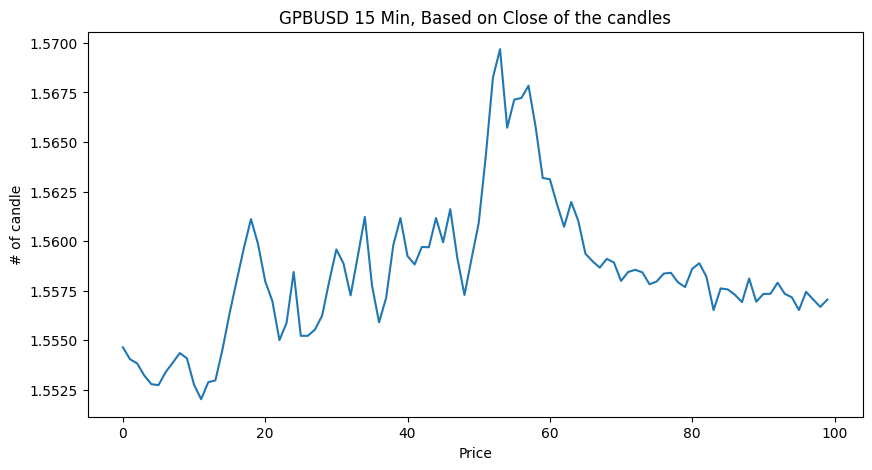

In [31]:
# Plotting the figure
plt.figure(figsize=(10, 5))
plt.plot(close_bars)
plt.title('GPBUSD 15 Min, Based on Close of the candles')
plt.xlabel('Price')
plt.ylabel('# of candle')
plt.show()

## Changing the index

In [36]:
data['datetime'] = pd.to_datetime(data['date'] + ' ' + data['time'])
data.head()

,date,time,open,high,low,close,datetime
0,2022.10.17,5:00,1.55482,1.55500,1.55409,1.55464,2022-10-17 05:00:00
1,2022.10.17,5:15,1.55464,1.55488,1.55401,1.55404,2022-10-17 05:15:00
2,2022.10.17,5:30,1.55404,1.55518,1.55362,1.55383,2022-10-17 05:30:00
3,2022.10.17,5:45,1.55383,1.55432,1.55304,1.55322,2022-10-17 05:45:00
4,2022.10.17,6:00,1.55322,1.55356,1.55244,1.55278,2022-10-17 06:00:00


In [37]:
data.drop(columns=['date', 'time'], inplace=True)
data.head()

,open,high,low,close,datetime
0,1.55482,1.55500,1.55409,1.55464,2022-10-17 05:00:00
1,1.55464,1.55488,1.55401,1.55404,2022-10-17 05:15:00
2,1.55404,1.55518,1.55362,1.55383,2022-10-17 05:30:00
3,1.55383,1.55432,1.55304,1.55322,2022-10-17 05:45:00
4,1.55322,1.55356,1.55244,1.55278,2022-10-17 06:00:00


In [40]:
data.set_index('datetime', inplace=True)
data.head()

,open,high,low,close
datetime,,,,
2022-10-17 05:00:00,1.55482,1.55500,1.55409,1.55464
2022-10-17 05:15:00,1.55464,1.55488,1.55401,1.55404
2022-10-17 05:30:00,1.55404,1.55518,1.55362,1.55383
2022-10-17 05:45:00,1.55383,1.55432,1.55304,1.55322
2022-10-17 06:00:00,1.55322,1.55356,1.55244,1.55278


In [42]:
data_example = data[:100]
data_example.head()

,open,high,low,close
datetime,,,,
2022-10-17 05:00:00,1.55482,1.55500,1.55409,1.55464
2022-10-17 05:15:00,1.55464,1.55488,1.55401,1.55404
2022-10-17 05:30:00,1.55404,1.55518,1.55362,1.55383
2022-10-17 05:45:00,1.55383,1.55432,1.55304,1.55322
2022-10-17 06:00:00,1.55322,1.55356,1.55244,1.55278


## Plotting the Candlestick Chart

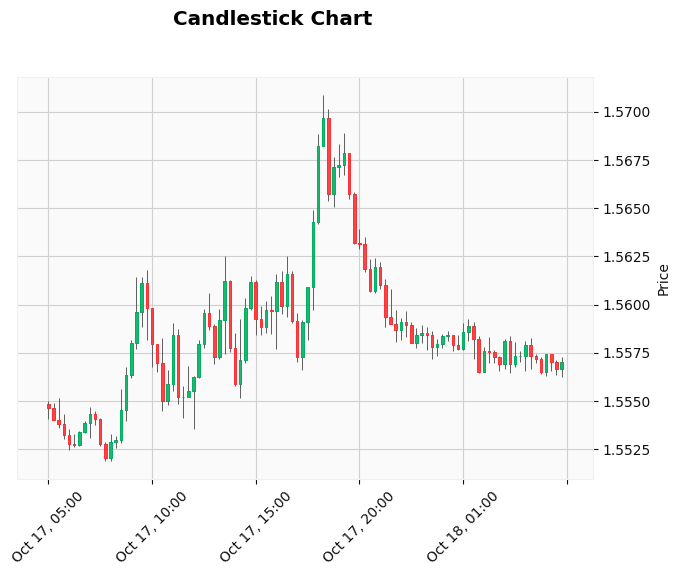

In [49]:
mpf.plot(data_example, type='candle', style='yahoo', title="Candlestick Chart")
mpf.show()

In [54]:
data['is_green'] = data.apply(lambda row: 1 if row['close'] - row['open'] > 0 else 0, axis=1)
data[:20]

,open,high,low,close,is_green
datetime,,,,,
2022-10-17 05:00:00,1.55482,1.55500,1.55409,1.55464,0
2022-10-17 05:15:00,1.55464,1.55488,1.55401,1.55404,0
2022-10-17 05:30:00,1.55404,1.55518,1.55362,1.55383,0
2022-10-17 05:45:00,1.55383,1.55432,1.55304,1.55322,0
2022-10-17 06:00:00,1.55322,1.55356,1.55244,1.55278,0
2022-10-17 06:15:00,1.55278,1.55330,1.55262,1.55273,0
2022-10-17 06:30:00,1.55273,1.55344,1.55266,1.55338,1
2022-10-17 06:45:00,1.55338,1.55396,1.55336,1.55386,1
2022-10-17 07:00:00,1.55386,1.55470,1.55310,1.55435,1
